## Wulff Construction

We are going to use the material Vanadium(V) with id mp-146, to perform the respective Wulff construction. To do this we will need the Wulffpack, PyXtal, and ASE libraries.

**a) a) Access Materials Project, download the respective .CIF file. Use PyXtal to print the list of surfaces and intensities in the X-ray powder diffraction pattern. Identify the three peaks with the highest intensity in the range of $2\theta = 0° - 90°$ and the respective associated surfaces. Indicate the libraries required and explain the lines of code used. Include a line summarizing the chosen surfaces.**

In order to obtain the X ray diffraction pattern for a metal, we need the file of its structure, just as we did in the previous notebook (see practice 3). In this case, we are going to work with **Vanadium**.

We go to the Materials Project webpage and log in with our account, then click on Start Exploring Materials and the search bar for Vanadium. We will use the structure with id `mp-146` (if you need more details navigating the Materials Project webpage, please refer to the previous notebook for further instructions).

Metal: Vanadium (V)

id: mp-146

To obtain the X-ray diffraction information, it is necessary to have the .cif file of the metal, which can be downloaded from Materials Project. After downloading it and saving it in the working folder, it is necessary to import the Pyxtal library and its class, also named Pyxtal, as this is where the X-ray diffraction information can finally be obtained.

In [1]:
# import Pyxtal class from the Pyxtal library
from pyxtal import pyxtal

After having the Pyxtal class, an object of this class is instantiated.

In [4]:
str_V = pyxtal()

In [2]:
from pkg_resources import resource_filename

In [3]:
cif_V = resource_filename("pyxtal", "V.cif")

Once the Pyxtal class object is created, it loads the structure from the Vanadium .cif file

In [5]:
str_V.from_seed("V.cif")

/home/paladin/anaconda3/envs/crystals/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/paladin/anaconda3/envs/crystals/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['hall_number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/paladin/anaconda3/envs/crystals/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/paladin/anaconda3/envs/crystals/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.w

In [6]:
str_V.get_XRD()

/home/paladin/anaconda3/envs/crystals/lib/python3.11/site-packages/pyxtal/XRD.py:123: RuntimeWarning: divide by zero encountered in scalar divide
  d_max = self.wavelength/np.sin(self.min2theta/2)/2


  2theta     d_hkl     hkl       Intensity  Multi
  42.884     2.109   [ 1  1  0]   100.00       12
  62.260     1.491   [ 2  0  0]    14.74        6
  78.569     1.218   [ 2  1  1]    28.12       24
  93.961     1.054   [ 2  2  0]     9.14       12
 109.654     0.943   [ 3  1  0]    15.68       24
 127.129     0.861   [ 2  2  2]     5.86        8
 150.561     0.797   [ 3  2  1]    60.00       48

**Picos con mayor intensidad en el rango de 2$theta$= 0-90**

**Peaks with higher intensity in the $2\theta$ range $= 0-90$.**
| Intensity | $2\theta$ | Associated surface |
| ---------| ----------| -------------------|
|100.00    |  42.884   |     (1,1,0)        |
|28.12     |  78.569   |     (2,1,1)        |
|14.74     |  62.260   |     (2,0,0)        |


**b)Use the surfaces identified in the previous step to create a dictionary with the following surface free energies: $0.645$, $0.584$, and $0.568$ $eV/Å²$. Explain how you create the dictionary.**

Since a dictionary contains keys and values, this surface energy dictionary will have as keys the representation of the surfaces identified in the previous point (i.e., (1,1,0), (2,1,1), (2,0,0)), and the values will be the surface free energies provided in the statement.

In [1]:
#dictionary of surfaces with higher energy formation
E_surf={(1,1,0):0.645, (2,1,1):0.584, (2,0,0):0.568}

**c) Create a primitive structure for your material, visualize the respective cell parameters (a, b, c) in Materials Project, and identify the type of crystal system. Indicate the libraries required and explain the lines of code used.**

To create a primitive structure for Vanadium, it is necessary to import the Bulk object from the build module of ASE:

In [2]:
from ase.build import bulk

After having the Bulk class, it is necessary to create the object, which takes as parameters the name of the metal, the type of crystal system (found on Materials Project), and the cell parameters. In this case, only the cell parameter $a$ is needed since it is a cubic system.

**Crystal system: Im-3m**

This indicates a body-centered cubic (bcc) system. However, upon checking the space group on Wikipedia, it is observed that the scheme for 229 corresponds to a face-centered cubic (fcc) system. Therefore, both systems are visualized.

$a=2.98$

In [3]:
prim=bulk('V', crystalstructure='bcc', a=2.98, cubic=True)

In [12]:
type(prim)

ase.atoms.Atoms

In [9]:
prim_fcc=bulk('V', crystalstructure='fcc', a=2.98, cubic=True)

**d) Perform two (2) Wulff constructions using Wulffpack with 3,000 and 10,000 atoms, respectively. Indicate the libraries required and explain the lines of code used.**

To perform Wulff constructions, the Wulffpack library is imported, and from it, the SingleCrystal class is also imported.

In [4]:
#import wulffpack
from wulffpack import SingleCrystal

Next, we create an object of the SingleCrystal class. Its parameters include the dictionary of surface free energies, the primitive structure of Vanadium, and the number of atoms.

In [5]:
particle_3000 = SingleCrystal(surface_energies=E_surf, primitive_structure=prim, natoms = 3000)

We visualize the particle

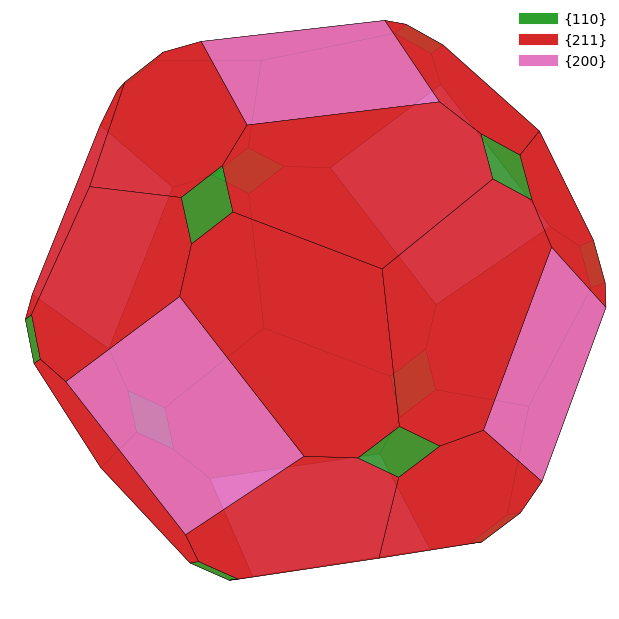

In [6]:
particle_3000.view()

We create another particle but this time with 10000 atoms

In [7]:
particle_10000 = SingleCrystal(surface_energies=E_surf, primitive_structure=prim, natoms = 10000)

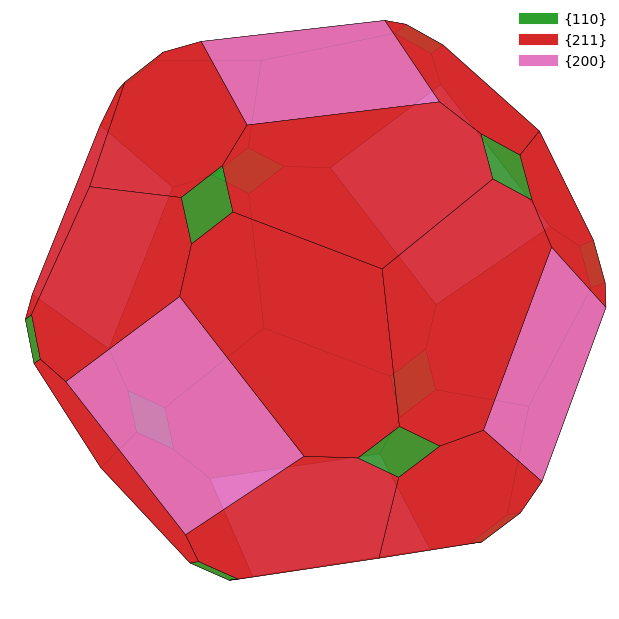

In [8]:
particle_10000.view()

Note that for this particle we used the bcc primitive system and now we are going to create new particles with the fcc system and compare them

In [10]:
particle_fcc_3000 = SingleCrystal(surface_energies=E_surf, primitive_structure=prim_fcc, natoms = 3000)

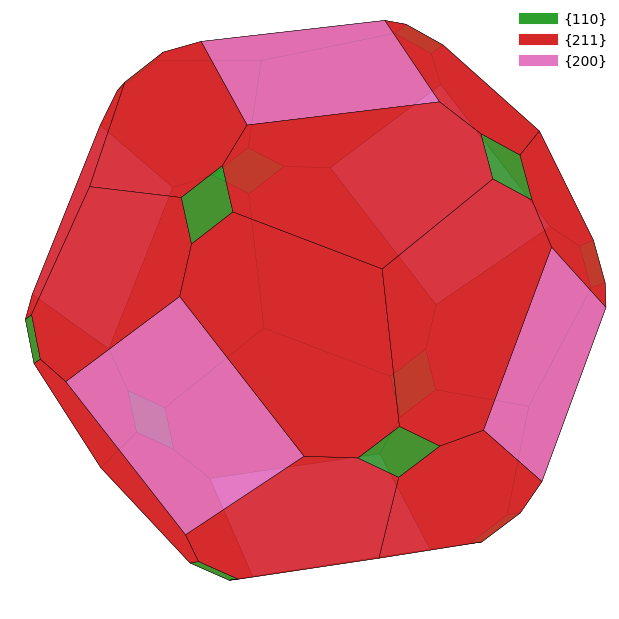

In [11]:
particle_fcc_3000.view()

In [12]:
particle_fcc_10000 = SingleCrystal(surface_energies=E_surf, primitive_structure=prim_fcc, natoms = 10000)

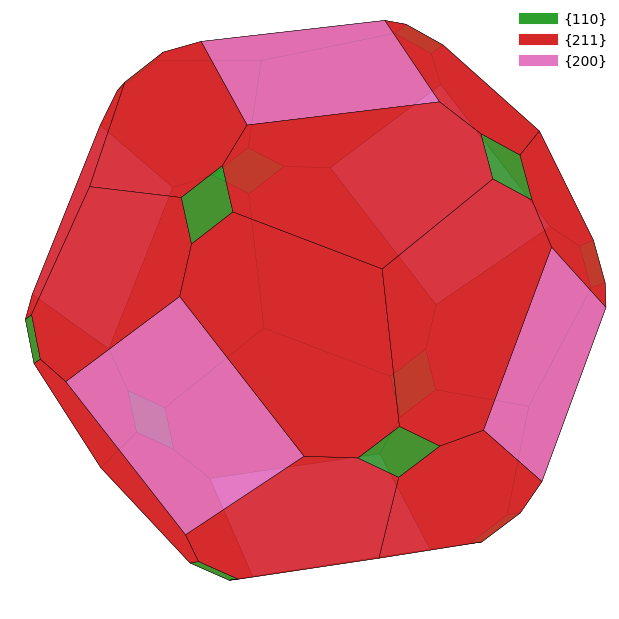

In [13]:
particle_fcc_10000.view()

There do not appear to be significant differences (visually identified) when using it as either an fcc or bcc crystal system.

**e) Export the results of the three Wulff constructions to the `.xyz` format (use clear and appropriate file names) and visualize them using ASE. Explain the lines of code used. Estimate the size of each nanoparticle created based on what is observed in the ASE GUI.**

To export the constructions, the write class from the io module of ASE is imported.

In [14]:
from ase.io import write
write('particle_V_3000.xyz',particle_3000.atoms)
write('particle_V_10000.xyz',particle_10000.atoms)

To estimate the size of the created nanoparticles, the previously saved files are opened, and two atoms are selected at each end of the nanoparticle. ASE then indicates the distance between these two atoms at the bottom right of the interface.

- Estimated size of the nanoparticle with 3000 atoms: $38.740$ $Å$

- Estimated size of the nanoparticle with 3000 atoms: $56.620$ $Å$

## Surface Construction

In order to develop this part of the practice, we are going to use the same material of the previous practice, $\text{CaTiO}_3$, which is a *perovskite*.

**a) Access Materials Project and visualize the powder diffraction pattern. Identify the three most intense peaks and the associated surfaces, and include a line in your Notebook summarizing this information. Download the .CIF file of the system in question.**

In order to obtain powder diffraction pattern, we are going to follow this steps. First, we have to log in with our accounts to Materials Project, which will lead us to this main page:

<img src="images/mp_init_page.png" width="700" style="margin:auto"/>

Then we click on `Start Exploring Materials`:

<img src="images/start_exploring_button.png" width="700" style="margin:auto"/>

We type in the material we are going to study and click search:

<img src="images/materials_search.png" width="700" style="margin:auto"/>

We select the first result, as we did in the previous practice and it will show us this new page:

<img src="images/material_overview.png" width="700" style="margin:auto"/>

Notice the menu on the left side of the screen. We are going to click on `Properties`, which will show us the following:

<img src="images/phase_diagram_step1.png" width="700" style="margin:auto"/>

Then on the upper menu we are going to select `Spectra`:

<img src="images/spectra_select.png" width="700" style="margin:auto"/>

Finally, as the selected mode is the one we need, we click on `Generate Diffraction pattern` and obtain the following:

<img src="images/xdr.png" width="800" style="margin:auto"/>

Summary of the information:

| Intensity | $2\theta$ | Associated surface |
| ---------| ----------| -------------------|
|100.00    |  33.128   |     (1,1,2)        |
|25.114    |  59.473   |     (3,1,2)        |
|25.11     |  32.788   |     (0,2,0)        |

**b) In the Notebook, read the downloaded file using read. Explain the lines of code used.**

To read the material's .cif file, the read class from the **io** module of **ASE** is imported, and then an object is instantiated with the file as a parameter.

In [1]:
from ase.io import read

In [2]:
CaTiO3 = read('CaTiO3.cif')

**c) Create the three respective surfaces, using a vacuum of 
$10 Å$ and 3 layers in all cases. Export (write) your results in `.CIF` format (use appropriate names). Indicate the libraries required and explain all lines of code used. The created surface corresponds to a $1 \times 1$ slab in each case.**

To create the surfaces, it is necessary to import the Surface class, also from ASE, from the build module.

In [3]:
from ase.build import surface

Next, an object of the Surface class is created for each of the three surfaces. To instantiate these objects, the following parameters are provided:

- First parameter: the material, which was previously read and stored in the variable CaTiO3.
- Second parameter: the surface, which corresponds to the surfaces present in the table summarizing XRD information.
- Third parameter: the number of layers to add, which will be 3 in all cases.
- Fourth parameter: the vacuum space (above and below the surface), which will be 10 Å.


In [4]:
surf_112 = surface(CaTiO3,(1,1,2),3,vacuum=10)
surf_312 = surface(CaTiO3,(3,1,2),3,vacuum=10)
surf_020 = surface(CaTiO3,(0,2,0),3,vacuum=10)

To visualize the surfaces, the view class from ASE is imported

In [5]:
from ase.visualize import view

In [6]:
#view(surf_112)
#view(surf_312)
view(surf_020)

<Popen: returncode: None args: ['/home/paladin/anaconda3/envs/crystals/bin/p...>

To save the surfaces as a .cif file, the write function from ASE is used, which takes the desired filename and the variable to save.

In [7]:
from ase.io import write

In [8]:
write('surf_CaTiO3_112.cif', surf_112)
write('surf_CaTiO3_312.cif', surf_312)
write('surf_CaTiO3_020.cif', surf_020)

**d) Select one of the three created surfaces and create two supercells from the $1 \times 1$ slab, particularly a $2 \times 3$ slab and a $3 \times 4$ slab. Save your results in `.CIF` format (use appropriate names). Explain all the lines of code used.**

To create supercells, the constructed surface is used as a starting point, and a list is provided indicating where the replicas should be made. For these supercells, the surface (3,1,2) is used.

To save the results, `write` is used as in the previous step.

In [9]:
surf_2x3= surf_312*[2,3,1]

In [13]:
view(surf_2x3)

<Popen: returncode: None args: ['/home/paladin/anaconda3/envs/crystals/bin/p...>

In [11]:
surf_3x4= surf_312*[3,4,1]

In [14]:
view(surf_3x4)

<Popen: returncode: None args: ['/home/paladin/anaconda3/envs/crystals/bin/p...>

In [12]:
write('surf_3x4_CaTiO3_312.cif', surf_3x4)
write('surf_2x3_CaTiO3_312.cif', surf_2x3)

**e) Visualize the results obtained in 2d) using ASE. Locate the first layer, and estimate the distances between extreme atoms along the x and y axes. Include a line in the Notebook summarizing your results**

To estimate the distance between extreme atoms along the x and y axes of the created supercells, the saved files are opened using ASE. The visualization is configured to position the z-axis "coming out" of the screen, allowing the x and y axes to be fully observed. Then, two atoms are selected—one at each end of the axes—and the value displayed in the lower-left corner of the screen provides the estimated distance.

<img src="images/supercells.png" width="800" style="margin:auto"/>

**Results**

- Supercell 2x3 distance: 36.467 Å
- Supercell 3x4 distance: 49.797 Å